In [10]:

import pandas as pd
import numpy  as np
import random
import matplotlib.pyplot as plt

dlen = 1024 #ノイズデータのデータ長
mean = 0.0  #ノイズの平均値
std  = 1.0  #ノイズの分散

y = np.array( [random.gauss(mean, std) for i in range(dlen)] )

plt.plot(y)
plt.show()


ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\Shinichi\anaconda3\envs\Lethargus_analysis_MS\python.exe"
  * The NumPy version is: "1.21.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 指定されたモジュールが見つかりません。


In [8]:
# GAUSSIAN_01

import numpy as np
import matplotlib.pyplot as plt

# ガウス関数を定義
def gauss(x, amp=1, mean=0, std=1):
    return amp * np.exp(-(x - mean)**2 / (2*std**2))

# Figureを作成
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)

# Axesのタイトルを'Gaussian Function'に設定
ax.set_title("Gaussian Function", fontsize=16)

# 目盛線を表示
ax.grid()

# 軸ラベルを設定
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)

# 軸範囲を設定
ax.set_xlim([-4, 8])
ax.set_ylim([0, 1.2])

# -4～8まで0.1刻みの数値の配列
x = np.arange(-4, 8, 0.1)

# グラフに描く関数
f1 = gauss(x)
f2 = gauss(x, amp=2)
f3 = gauss(x, amp=10)
# Axesにガウス関数を描画
ax.plot(x, f1, color="red", label="a=1.0, μ=0, σ=1")
ax.plot(x, f2, color="blue", label="a=2")
ax.plot(x, f3, color="black", label="a=10)
# 凡例の表示
ax.legend(fontsize=14)

SyntaxError: EOL while scanning string literal (<ipython-input-8-a9c68954e431>, line 40)

In [9]:
dlen = 1024 #ノイズデータのデータ長
mean = 0.0  #ノイズの平均値
std  = 1.0  #ノイズの分散
x = np.arange(-5.12, 5.12, 0.01)
test_noise =  np.array( [random.gauss(mean, std) for i in range(dlen)] )
test_gauss = gauss(x, amp=1, mean=0, std=1 )

NameError: name 'np' is not defined

In [ ]:
test = test_noise + test_gauss
test

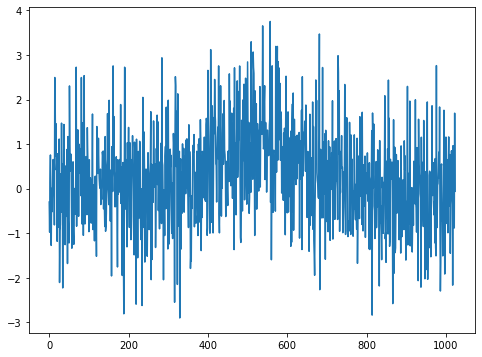

In [46]:
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)
ax.plot(test)

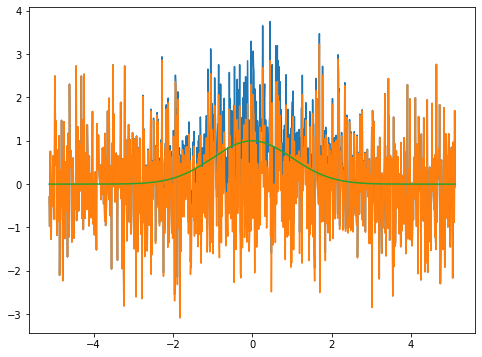

In [47]:
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)
ax.plot(x, test)
ax.plot(x, test_noise)
ax.plot(x, test_gauss)

In [153]:
# 幅と中心位置がわかっているから良い　という主張もできるといいな
def simulation_data_gen(prefix,
                        datapoints = 1024,
                        noise_amp=1,
                        noise_mean=0,
                        noise_std=1,
                        gauss_amp=1,
                        gauss_mean=0,
                        gauss_std=1,
                        iter_num = 10):
    os.makedirs("./simulation_data_{}".format(prefix), exist_ok=True)
    os.chdir("./simulation_data_{}".format(prefix))
    data = np.zeros(datapoints)
    for i in range(iter_num):
        #make x axis
        x_axis = np.linspace(-1, 1, datapoints)
        noise_data = np.array([random.gauss(noise_mean, noise_std)
                               for i
                               in range(datapoints)])
        gauss_data = gauss_amp * np.exp(-(x_axis - gauss_mean)**2 / (gauss_std**2))
        tempdata = noise_data + gauss_data
        data = np.vstack([data, tempdata])
    data= data.T
    df = pd.DataFrame(data)
    np.savetxt('./x_axis.csv', x_axis)
    df.to_csv("./data_{}.csv".format(prefix))
    return data

In [154]:
os.getcwd()

'C:\\Users\\Miyazaki\\Desktop\\Simulation\\simulation_data_test2\\simulation_data_amp1'

In [155]:
os.chdir("C:/Users/Miyazaki/Desktop/Simulation")


In [156]:
data = simulation_data_gen("amp1",
                        datapoints = 1024,
                        noise_amp=1,
                        noise_mean=0,
                        noise_std=1,
                        gauss_amp=1,
                        gauss_mean=0,
                        gauss_std=0.25,
                        iter_num = 10)
data

array([[ 0.        , -1.96729325, -0.250733  , ...,  1.7898893 ,
        -1.51573445,  1.59127392],
       [ 0.        , -0.51538638,  1.55119324, ..., -0.22181691,
        -1.22339627,  1.26886715],
       [ 0.        ,  0.14275566, -0.88418727, ...,  0.8492327 ,
         0.82854533,  0.11534002],
       ...,
       [ 0.        , -0.28072701, -1.18919788, ...,  0.72581905,
         0.23322098,  0.9404858 ],
       [ 0.        , -0.55637117, -1.50352106, ..., -0.76061332,
         0.25245797,  0.64568672],
       [ 0.        , -0.89649364,  0.67909097, ...,  0.5084434 ,
         0.58844044,  0.64430407]])